<a href="https://colab.research.google.com/github/michellethr/recommender/blob/main/Cross_Domain_Recommender_Systems_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-Domain Recommender Systems
## Claudia Papi and Michelle Throssell

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataframes and adding column names
kindle_r = pd.read_csv('/content/drive/MyDrive/project-recommender/csv files/Kindle_Store.csv', names = ['item', 'user', 'rating', 'timestamp'])
movies_tv_r = pd.read_csv('/content/drive/MyDrive/project-recommender/csv files/Movies_and_TV.csv', names = ['item', 'user', 'rating', 'timestamp'])
digital_music_r = pd.read_csv('/content/drive/MyDrive/project-recommender/csv files/Digital_Music.csv', names = ['item', 'user', 'rating', 'timestamp'])


In [ ]:
# add source column
kindle_r['domain'] = 'Kindle_Store'
movies_tv_r['domain'] = 'Movies_and_TV'
digital_music_r['domain'] = 'Digital_Music'


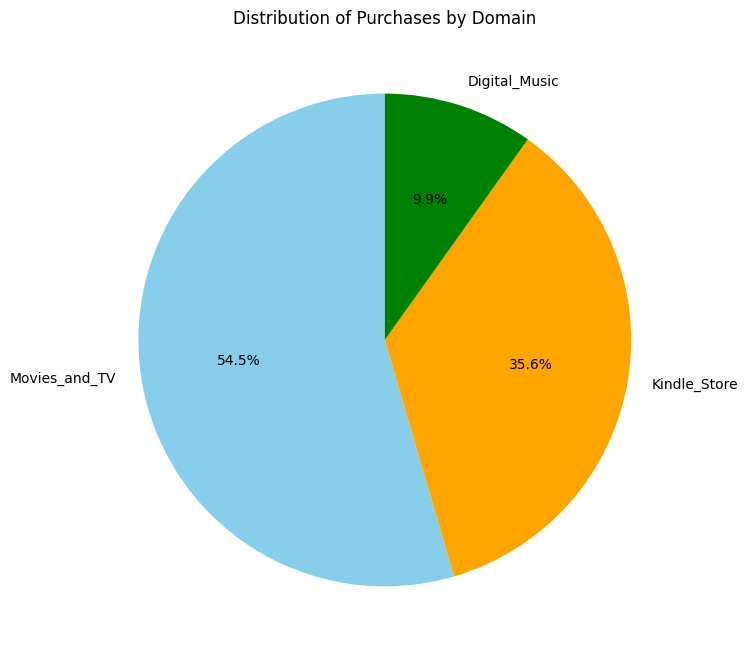

In [ ]:
dataframes = [kindle_r, movies_tv_r, digital_music_r]
df = pd.concat(dataframes, ignore_index=True)
domain_counts = df['domain'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
plt.title('Distribution of Purchases by Domain')
plt.show()

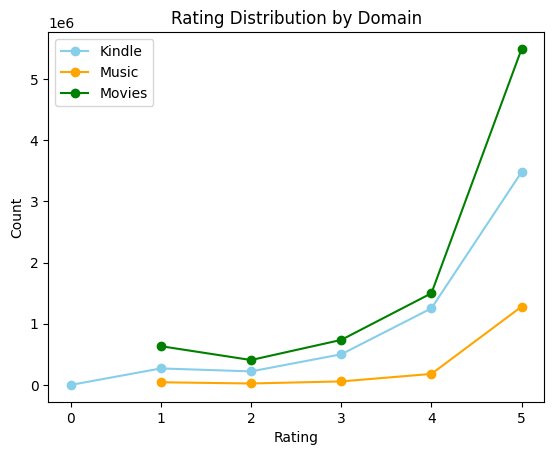

In [ ]:
df_music = df[df['domain'] == 'Kindle_Store']
df_music['rating'].value_counts().sort_index().plot(kind='line', marker='o', label='Kindle', color='skyblue')

# Plotting for 'kindle' domain
df_kindle = df[df['domain'] == 'Digital_Music']
df_kindle['rating'].value_counts().sort_index().plot(kind='line', marker='o', label='Music', color='orange')

# Plotting for 'tv' domain
df_tv = df[df['domain'] == 'Movies_and_TV']
df_tv['rating'].value_counts().sort_index().plot(kind='line', marker='o', label='Movies', color='green')

# Set labels, title, and legend
plt.title('Rating Distribution by Domain')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()

plt.show()

In [ ]:
# take smaller samples
kindle_r = kindle_r.sample(n=1000000, random_state=1)
movies_tv_r = movies_tv_r.sample(n=1000000, random_state=1)
digital_music_r = digital_music_r.sample(n=1000000, random_state=1)

In [ ]:
# drop 'timestamp' column
kindle_r.drop(['timestamp'], axis=1,inplace=True)
movies_tv_r.drop(['timestamp'], axis=1,inplace=True)
digital_music_r.drop(['timestamp'], axis=1,inplace=True)

In [ ]:
# add source column
kindle_r['domain'] = 'Kindle_Store'
movies_tv_r['domain'] = 'Movies_and_TV'
digital_music_r['domain'] = 'Digital_Music'

In [ ]:
# concatenate dataframes
dataframes = [kindle_r, movies_tv_r, digital_music_r]
df = pd.concat(dataframes, ignore_index=True)

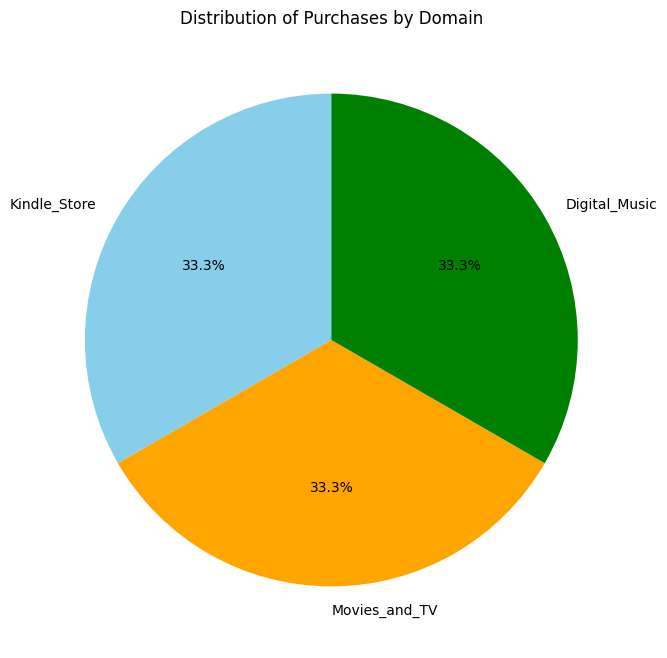

In [ ]:
domain_counts = df['domain'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
plt.title('Distribution of Purchases by Domain')
plt.show()

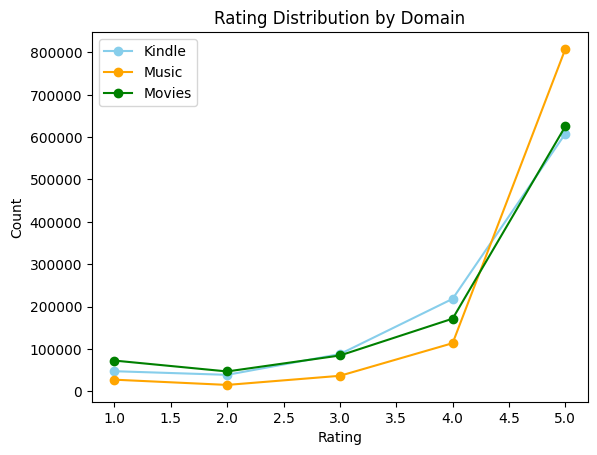

In [ ]:
df_music = df[df['domain'] == 'Kindle_Store']
df_music['rating'].value_counts().sort_index().plot(kind='line', marker='o', label='Kindle', color='skyblue')

# Plotting for 'kindle' domain
df_kindle = df[df['domain'] == 'Digital_Music']
df_kindle['rating'].value_counts().sort_index().plot(kind='line', marker='o', label='Music', color='orange')

# Plotting for 'tv' domain
df_tv = df[df['domain'] == 'Movies_and_TV']
df_tv['rating'].value_counts().sort_index().plot(kind='line', marker='o', label='Movies', color='green')

# Set labels, title, and legend
plt.title('Rating Distribution by Domain')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()

plt.show()

In [ ]:
# Filter rows where 'domain' is 'Kindle_Store'
kindle_df = df[df['domain'] == 'Kindle_Store']

# Calculate the average rating for each unique item
average_ratings = kindle_df.groupby('item')['rating'].mean()

# Calculate the overall average rating for all unique items
overall_average_rating = average_ratings.mean()

print("Overall Average Rating for Kindle Items:", overall_average_rating)

Overall Average Rating for Kindle Items: 4.255000147919712


In [ ]:
# Filter rows where 'domain' is 'Movies_and_TV'
movies_tv_df = df[df['domain'] == 'Movies_and_TV']

# Calculate the average rating for each unique item
average_ratings = movies_tv_df.groupby('item')['rating'].mean()

# Calculate the overall average rating for all unique items
overall_average_rating = average_ratings.mean()

print("Overall Average Rating for Movies and TV Items:", overall_average_rating)

Overall Average Rating for Movies and TV Items: 4.0971367466240824


In [ ]:
# Filter rows where 'domain' is 'Digital_Music'
digital_music_df = df[df['domain'] == 'Digital_Music']

# Calculate the average rating for each unique item
average_ratings = digital_music_df.groupby('item')['rating'].mean()

# Calculate the overall average rating for all unique items
overall_average_rating = average_ratings.mean()

print("Overall Average Rating for Digital Music Items:", overall_average_rating)

Overall Average Rating for Digital Music Items: 4.655240528415739


In [ ]:
print("Ratings Summary")
print("\nTotal # of Ratings:",df.shape[0])
print("Total # of Users:", len(np.unique(df.user)))
print("Total # of Products:", len(np.unique(df.item)))

Ratings Summary

Total # of Ratings: 3000000
Total # of Users: 1870826
Total # of Products: 677244


In [ ]:
df['rating'].mean()

4.398229

In [ ]:
df.groupby("user").rating.count().reset_index().sort_values(by=["rating"], ascending=False)

,user,rating
1429777,A3W4D8XOGLWUN5,828
1019953,A328S9RN3U5M68,754
226463,A1GGOC9PVDXW7Z,533
1804839,AV6QDP8Q0ONK4,508
1735193,AQ4B80F0JSBNI,447
...,...,...
700791,A2EY3QIRP9URIX,1
700788,A2EY3E3T3100XF,1
700787,A2EY383JC1OT8E,1
700786,A2EY35H5DT4MFH,1


In [ ]:
df.groupby('item')['rating'].count().sort_values(ascending=False)

item
B00YSG2ZPA    2761
B00006CXSS    2718
B000WGWQG8    2709
B00C2WDD5I    2649
B00YN6XHMU    2527
              ... 
B006MKRWB2       1
B006MKRFV4       1
B006MKGNVW       1
B006MK4YN6       1
B01HJH82WY       1
Name: rating, Length: 677244, dtype: int64

## Exploration Data Analysis

In [ ]:
print(df.columns)

Index(['item', 'user', 'rating', 'domain', 'overall_count', 'mean_rating'], dtype='object')


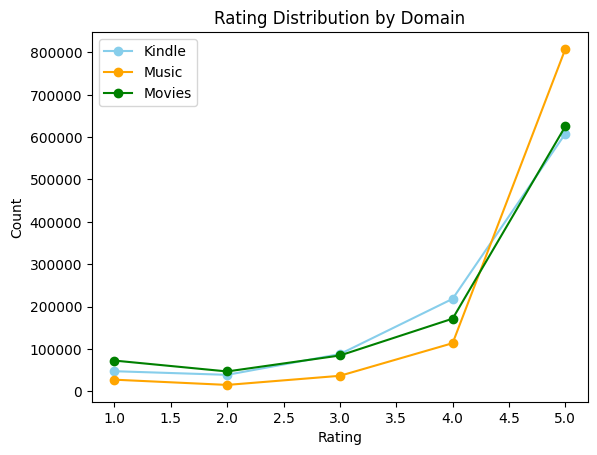

#Popularity-Based Recommender

## A Popularity-Based Recommender suggests items to users based on their overall popularity. Instead of personalizing recommendations for individual users, a popularity-based recommender recommends items that are widely liked by a large number of users. The idea is to recommend what is generally popular or trending, making it a simple and easy-to-implement approach for providing recommendations, especially when user-specific data is limited or unavailable.

In [ ]:
# Function that computes the weighted rating of each product
def weighted_rating(
    df,
    m,
    C
):
    v = df['overall_count']
    R = df['mean_rating']

    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Calculate the overall count of reviews per product
df['overall_count'] = df.groupby('item')['user'].transform('count')

# Calculate the average rating for each product (out of 5)
df['mean_rating'] = df.groupby('item')['rating'].transform('mean')

# Identify the 90th percentile of overall counts
threshold = df['overall_count'].quantile(0.90)

# Filter out qualified products into a new DataFrame
q_df = df[df['overall_count'] >= threshold].copy()

# Define a new feature 'popularity score'
m = df['overall_count'].quantile(0.90)
C = df['mean_rating'].mean()

# Calculate the 'pop_score' using the weighted_rating function
q_df['pop_score'] = weighted_rating(q_df, m, C)

In [ ]:
q_df.head(3).sort_values('pop_score', ascending=False)

,item,user,rating,domain,overall_count,mean_rating,pop_score
68,B00JDY7UO8,A29AOW0DE5WMDV,5.0,Kindle_Store,495,4.406061,4.402872
56,B005OMBTKY,APLG90TYIUSR6,2.0,Kindle_Store,370,4.172973,4.280842
89,B00ABLJ5X6,A3SC7UAY5BLQW0,5.0,Kindle_Store,1027,4.142162,4.205851


In [ ]:
q_df.tail(3).sort_values('pop_score', ascending=False)

,item,user,rating,domain,overall_count,mean_rating,pop_score
2999999,B0135P6PZA,A1UMZB8VVW7DTI,1.0,Digital_Music,2119,4.821142,4.762667
2999991,B00IKS2BHY,A2B4YZNCET7WN4,4.0,Digital_Music,568,4.431338,4.418940
2999968,B01H5ZYNLY,A1BJBB3O3YWFWO,5.0,Digital_Music,362,4.325967,4.360966


# SVD Collaborative Filtering

## Singular Value Decomposition is a Collaborative Filtering technique. It involves decomposing the user-item interaction matrix into latent factors and making recommendations based on the reconstructed matrix. Unlike popularity-based recommenders, collaborative filtering methods aim to make personalized recommendations based on the preferences and behaviors of similar users.

In [ ]:
!pip install surprise
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163754 sha256=82c636238c0a4de3a9c5e5d19be91956d8ffd4ef8f6786f65a342f3156f25a5c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD

# SVD training

# initialize reader
reader = Reader()
# initialize algorithm
svd = SVD()

# convert pandas df to surprise df
data = Dataset.load_from_df(trainset[['user', 'item', 'rating']], reader)

# split data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# train model
svd.fit(train_data)

In [ ]:
# SVD prediction
svd.predict(uid='B0135P6PZA', iid='A1UMZB8VVW7DTI')

Prediction(uid='B0135P6PZA', iid='A1UMZB8VVW7DTI', r_ui=None, est=4.397627301587302, details={'was_impossible': False})

In [ ]:
# SVD evaluation
cross_validate(
    svd,
    data,
    measures=['RMSE'],
    cv=3,
    verbose=True
)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0111  1.0085  1.0079  1.0092  0.0014  
Fit time          42.42   43.93   47.14   44.50   1.97    
Test time         7.56    6.39    12.64   8.86    2.71    


{'test_rmse': array([1.01113288, 1.00849718, 1.00793115]),
 'fit_time': (42.41896605491638, 43.93090343475342, 47.13532209396362),
 'test_time': (7.557941913604736, 6.390100479125977, 12.63776707649231)}

#KNN Collaborative Filtering
##K-Nearest Neighbors is a Collaborative Filtering technique. It relies on identifying similar users or items within a user-item interaction matrix. For user-based KNN, it locates users with comparable preferences to the target user, recommending items liked by those similar users.  The similarity between users or items is typically calculated using metrics like cosine similarity or Pearson correlation.

In [ ]:
knn = KNNBasic()

# KNN training
data = Dataset.load_from_df(train_set[["user", "item", "rating"]], reader)

# KNN evaluation
cross_validate(
    knn,
    data,
    measures=['RMSE'],
    cv=3,
    verbose=True
)

# Content-Based Recommender
## A content-based recommender system suggests items to users based on the characteristics of the items and the preferences expressed by the user. Each item is described by a set of features, such as key words extracted from reviews. The system recommends items that are similar to those the user has liked before, based on shared features.

In [ ]:
# for this engine we need the metadata

import os
from google.colab import drive
import pandas as pd
import gzip
import json

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/project-recommender")

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

Mounted at /content/drive


# Natural Language processing, aka NLP, has already been performed on the reviewText field. As a result, the summary field has its key words.

In [ ]:
kindle = getDF('Kindle_Store_5.json.gz')
kindle = kindle.sample(n=100000, random_state=1)
kindle.drop(['reviewTime','style','unixReviewTime','vote','image','reviewText'], axis=1,inplace=True)
kindle['domain'] = 'Kindle_Store'
kindle.head(3)

,overall,verified,reviewerID,asin,reviewerName,summary,domain
1760808,5.0,True,A1OU8LRUMZ1Y0V,B00DK42O84,Fawn Coleman,Gotta love those warriors!,Kindle_Store
907938,1.0,True,A2NWNSSK9AETUS,B00PUSKH14,Sara J Craven,One Star,Kindle_Store
1779392,4.0,True,A9LRFLTU3L58Q,B00ET7Q4OG,cheryl cowgill,Four Stars,Kindle_Store


In [ ]:
digital_music = getDF('Digital_Music_5.json.gz')
digital_music = digital_music.sample(n=100000, random_state=1)
digital_music.drop(['reviewTime','style','unixReviewTime','vote','image','reviewText'], axis=1,inplace=True)
digital_music['domain'] = 'Digital_Music'
digital_music.head()

,overall,verified,reviewerID,asin,reviewerName,summary,domain
146476,5.0,True,A5SVUGPL1KDHU,B001O3CSR0,Jeannie,dancer,Digital_Music
109800,5.0,True,A2F3CXXSQ1UZHM,B00U3WJIE4,real gypsy girl,Love it!,Digital_Music
68207,5.0,True,A3MSNBTO3DDOF0,B004EF1M2C,Timothy Kendall,Five Stars,Digital_Music
114060,5.0,True,A2KC1NSRM7JJFW,B013D1KC9Q,Leigh B.,Great Band,Digital_Music
127559,5.0,True,AK22YPZX384RR,B000WM0NXA,Alissa,Five Stars,Digital_Music


In [ ]:
movies_tv = getDF('Movies_and_TV_5.json.gz')
movies_tv = movies_tv.sample(n=100000, random_state=1)
movies_tv.drop(['reviewTime','style','unixReviewTime','vote','image','reviewText'], axis=1,inplace=True)
movies_tv['domain'] = 'Movies_and_TV'
movies_tv.head()

,overall,verified,reviewerID,asin,reviewerName,summary,domain
723051,5.0,False,A2961QX4I2DZOC,B00005LC1F,Paul McQuaid,Just for laughs,Movies_and_TV
616594,1.0,False,A17G7WJKAJVKQW,B00004Z4WQ,Mike,"Awful, and NOT cuz I'm a prude",Movies_and_TV
205037,5.0,False,A2V3P1XE33NYC3,6302314674,Jeffrey Leach,Get in the Car!,Movies_and_TV
2829258,5.0,True,A2HRMUL3XI6SNT,B00SB9Y6KW,Donna Joy Radford,Five Stars,Movies_and_TV
1108290,5.0,True,A3RAX2F4TYLLKP,B000FWHW86,Clint Heisler,Five Stars,Movies_and_TV


In [ ]:
dataframes = [kindle, digital_music, movies_tv]
df = pd.concat(dataframes, ignore_index=True)
df.iloc[[0, 100000,200000]]

,overall,verified,reviewerID,asin,reviewerName,summary,domain
0,5.0,True,A1OU8LRUMZ1Y0V,B00DK42O84,Fawn Coleman,Gotta love those warriors!,Kindle_Store
100000,5.0,True,A5SVUGPL1KDHU,B001O3CSR0,Jeannie,dancer,Digital_Music
200000,5.0,False,A2961QX4I2DZOC,B00005LC1F,Paul McQuaid,Just for laughs,Movies_and_TV


In [ ]:
# Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace NaN values with an empty string
df['summary'] = df['summary'].fillna('')

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['summary'])

# Array mapping from feature integer indices to feature name.
feature_names = tfidf.get_feature_names_out()

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Construct a reverse map of indices and items
indices = pd.Series(df.index, index=df['item']).drop_duplicates()


In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(item, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[item]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    item_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['item'].iloc[item_indices]

get_recommendations('B01H5ZYNLY')

Next Step: Find Optimal Model

In [ ]:
from surprise.model_selection import RandomizedSearchCV

def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse'])
    clf.fit(data)
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf